In [22]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectPercentile
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [23]:
#read the train and test file and drop the last un-necessary column
def read_data():
    col_names = ["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerro_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","class",42]
    print(len(col_names))
    data = pd.read_csv('KDDTrain2.csv',names=col_names,index_col=False)
    test = pd.read_csv('KDDTest2.csv',names=col_names,index_col=False)
    #print(data['class'])
    data=data.drop([42],axis=1)
    test=test.drop([42],axis=1)
    return data,test

In [25]:
#split to attributes and features
def x_y(data):
    x=data.iloc[:,:-1]
    y=data.iloc[:,-1]
    return x,y

In [26]:
#scale data using max min scaler - numeric features only
def scale_data(x):
    num_col_names=["duration","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells","num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate","rerro_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count","dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate"]
    scaler = MinMaxScaler()
    x[num_col_names]=x[num_col_names].astype(float)
    #print(x_train)
    x[num_col_names]=scaler.fit_transform(x[num_col_names])
    #print(x_train)
    return x

In [27]:
#get categorical list of service col
def get_value_code(x_train):
    cat=['IRC', 'X11', 'Z39_50', 'aol', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf', 'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i', 'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'harvest', 'hostnames', 'http', 'http_2784', 'http_443', 'http_8001', 'imap4', 'iso_tsap', 'klogin', 'kshell', 'ldap', 'link', 'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns', 'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u', 'other', 'pm_dump', 'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje', 'shell', 'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat', 'telnet', 'tftp_u', 'tim_i', 'time', 'urh_i', 'urp_i', 'uucp', 'uucp_path', 'vmnet', 'whois']
    col=x_train['service']
    cat_list=set(col)
    cat = set(cat)
    print(cat_list.difference(cat))
    final=list(cat.union(cat_list))
    print(len(final))
    return final

In [28]:
#one hot encode the x_train data
def one_hot_encode_train(x_train,cat):
    x_train=pd.concat([x_train,pd.get_dummies(x_train['protocol_type'])],axis=1)
    x_train.drop(['protocol_type'],axis=1,inplace=True)
    print(x_train.columns.values)
    xt2 = list(x_train['service'])
    t2 = pd.Series(xt2)
    t2 = t2.astype('category',categories=cat)
    dt2 = pd.get_dummies(t2)
    x_train = pd.concat([x_train,dt2],axis=1)
    x_train.drop(['service'],axis=1,inplace=True)
    x_train = pd.concat([x_train,pd.get_dummies(x_train['flag'])],axis=1)
    x_train.drop(['flag'],axis=1,inplace=True)
    print(x_train)
    #print(x_train.shape)
    return x_train

In [29]:
#one hot encode x_test data set
def one_hot_encode_test(x_test,cat):
    t1 = pd.get_dummies(x_test['protocol_type'])
    x_test = pd.concat([x_test,t1],axis=1)
    x_test.drop(['protocol_type'],axis=1,inplace=True)
    #print(x_test)
    print("length",len(cat))
    xt2 = list(x_test['service'])
   # print(xt2)
    t2 = pd.Series(xt2)
    t2 = t2.astype('category',categories=cat)
    dt2 = pd.get_dummies(t2)
    x_test = pd.concat([x_test,dt2],axis=1)
    x_test.drop(['service'],axis=1,inplace=True)
    #print(x_test.shape)
    #xt3 = x_test.iloc[:,3]
    #print(xt3)
    t3= pd.get_dummies(x_test['flag'])
    x_test = pd.concat([x_test,t3],axis=1)
    x_test.drop(['flag'],axis=1,inplace=True)
    #print(x_test.shape)
    return x_test

In [30]:
#select features using select percentile method
def select_features(x_train,y_train):
    selected = SelectPercentile(percentile=43)
    selected.fit(x_train,y_train)
    header=x_train.columns.values.tolist()
    x_train_selected=selected.transform(x_train)
    #print('X train shape:',x_train.shape)
    #print('x train selected shape',x_train_selected.shape)
    mask = selected.get_support()
    #print(mask)
    #print(mask.shape)
    plt.matshow(mask.reshape(1,-1),cmap="gray_r")
    dictionary = dict(zip(header,mask))
    #print(dictionary)
    for cat in dictionary:
        if dictionary[cat]==False:
            x_train=x_train.drop([cat],axis=1)
    return dictionary,x_train,y_train

In [31]:
#remove the unselected features in test data set
def prep_test_data(x_test,dictionary):
    for cat in dictionary:
        if dictionary[cat]==False:
            x_test=x_test.drop([cat],axis=1)
    return x_test

In [32]:
#naive bayes 1 to differintiate between normal and attack type
def nb_build(x_train,y_train):
    nB1 = GaussianNB()
    nB1.fit(x_train,y_train)
    return nB1

In [33]:
def nb_predict(x_test,y_test,classifier):
    y_predict=classifier.predict(x_test)
    return y_predict
        

In [40]:
#multi level naive bayes classifier - returns accuraccy
def multilevel(x_test,y_test,x_train,y_train):
    y_test_list1 = y_test.values.tolist()
    #y_given=y_test_list
    #y_cal=list()
    rows = len(y_test.index)
    print(len(x_test.index))
    #classifier 1 for differintiating between normal &attack type
    classifier1=nb_build(x_train,y_train)
    y_predict1=nb_predict(x_test,y_test,classifier1)
    normal_list=list()
    normal_list_train=list()
    count=0
    for i,val in enumerate(y_predict1):
        if val == 'normal':
            normal_list.append(i)
            #print("value",val)
            #print("given value",y_test_list[i])
            if val==y_test_list1[i]:
                count=count+1
    x_test=x_test.drop(x_test.index[normal_list])
    #print("x_test is",x_test)
    y_test=y_test.drop(y_test.index[normal_list])
    for i,val in enumerate(y_train):
        if val=='normal':
            normal_list_train.append(i)
    #print(normal_list_train)
    x_train=x_train.drop(x_train.index[normal_list_train])
    y_train=y_train.drop(y_train.index[normal_list_train])
    #print("Y_train",y_train)
    #print(count)
    #classifier 2 for differintiating between dos & r2l,u2r,probe attack data
    classifier2=nb_build(x_train,y_train)
    y_predict2=nb_predict(x_test,y_test,classifier2)
    dos_list=list()
    dos_list_train=list()
    y_test_list2 = y_test.values.tolist()
    for i,val in enumerate(y_predict2):
        if val == 'dos':
            dos_list.append(i)
            #print("value",val)
            #print("given value",y_test_list[i])
            if val==y_test_list2[i]:
                count=count+1
    #print(dos_list)
    x_test=x_test.drop(x_test.index[dos_list])
    y_test=y_test.drop(y_test.index[dos_list])
    for i,val in enumerate(y_train):
        if val=='normal':
            dos_list_train.append(i)
    x_train=x_train.drop(x_train.index[dos_list_train])
    y_train=y_train.drop(y_train.index[dos_list_train])
    #print(count)
    #classifier 3 for differintiating between r2l & u2r,probe attack types
    classifier3=nb_build(x_train,y_train)
    y_predict3=nb_predict(x_test,y_test,classifier3)
    r2l_list=list()
    r2l_list_train=list()
    y_test_list3 = y_test.values.tolist()
    for i,val in enumerate(y_predict3):
        if val == 'r2l':
            r2l_list.append(i)
            #print("value",val)
            #print("given value",y_test_list[i])
            if val==y_test_list3[i]:
                count=count+1
    x_test=x_test.drop(x_test.index[r2l_list])
    y_test=y_test.drop(y_test.index[r2l_list])
    for i,val in enumerate(y_train):
        if val=='r2l':
            dos_list_train.append(i)
    x_train=x_train.drop(x_train.index[r2l_list_train])
    y_train=y_train.drop(y_train.index[r2l_list_train])
    print(count)
    #classifier 4 for differintiating between u2r & probe
    classifier4=nb_build(x_train,y_train)
    y_predict4=nb_predict(x_test,y_test,classifier4)
    y_test_list4=y_test.values.tolist()
    for i,val in enumerate(y_predict4):
            if val==y_test_list4[i]:
                count=count+1
    print(count)
    acc = count/rows
    #print(acc)
    return acc
            
    


In [35]:
#predict
def prediction(x_test,y_test,classifier):
    y_predict=classifier.predict(x_test)
    print(accuracy_score(y_predict,y_test))

In [36]:
#build descion tree classifier
def build_model(x_train,y_train):
    model = tree.DecisionTreeClassifier()
    model = model.fit(x_train,y_train)
    return model

In [37]:
#test descion tree model
def test_model(model,x_test,y_test):
    y_predict=model.predict(x_test)
    #print(y_predict)
    print(accuracy_score(y_predict,y_test))

In [42]:
#further reduce test data
def test_data_formulate(x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)
    return x_train,x_test,y_train,y_test

43
{'r2l4'}
71
['duration' 'service' 'flag' 'src_bytes' 'dst_bytes' 'land'
 'wrong_fragment' 'urgent' 'hot' 'num_failed_logins' 'logged_in'
 'num_compromised' 'root_shell' 'su_attempted' 'num_root'
 'num_file_creations' 'num_shells' 'num_access_files' 'num_outbound_cmds'
 'is_host_login' 'is_guest_login' 'count' 'srv_count' 'serror_rate'
 'srv_serror_rate' 'rerro_rate' 'srv_rerror_rate' 'same_srv_rate'
 'diff_srv_rate' 'srv_diff_host_rate' 'dst_host_count'
 'dst_host_srv_count' 'dst_host_same_srv_rate' 'dst_host_diff_srv_rate'
 'dst_host_same_src_port_rate' 'dst_host_srv_diff_host_rate'
 'dst_host_serror_rate' 'dst_host_srv_serror_rate' 'dst_host_rerror_rate'
 'dst_host_srv_rerror_rate' 'icmp' 'tcp' 'udp']


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  # This is added back by InteractiveShellApp.init_path()


        duration  src_bytes  dst_bytes  land  wrong_fragment  urgent  hot  \
0              0        491          0     0               0       0    0   
1              0        146          0     0               0       0    0   
2              0          0          0     0               0       0    0   
3              0        232       8153     0               0       0    0   
4              0        199        420     0               0       0    0   
5              0          0          0     0               0       0    0   
6              0          0          0     0               0       0    0   
7              0          0          0     0               0       0    0   
8              0          0          0     0               0       0    0   
9              0          0          0     0               0       0    0   
10             0          0          0     0               0       0    0   
11             0          0          0     0               0       0    0   

/home/manisha/.local/lib/python3.5/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [16 56] are constant.
  UserWarning)
/home/manisha/.local/lib/python3.5/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


        duration  wrong_fragment  hot  num_failed_logins  logged_in  \
0              0               0    0                  0          0   
1              0               0    0                  0          0   
2              0               0    0                  0          0   
3              0               0    0                  0          1   
4              0               0    0                  0          1   
5              0               0    0                  0          0   
6              0               0    0                  0          0   
7              0               0    0                  0          0   
8              0               0    0                  0          0   
9              0               0    0                  0          0   
10             0               0    0                  0          0   
11             0               0    0                  0          0   
12             0               0    0                  0          1   
13    

1559
1762
0.7813747228381375
0.7764966740576497


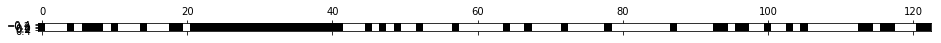

In [43]:
#main fuction
def main():
    data,test=read_data()
    #print(data[:,-1])
    x_train,y_train=x_y(data)
    #x_train=scale_data(x_train)
    x_test,y_test=x_y(test)
    #x_test=scale_data(x_test)
    cat=get_value_code(x_train)
    x_train=one_hot_encode_train(x_train,cat)
    x_test = one_hot_encode_test(x_test,cat)
    x_test_h = x_test.columns.values.tolist()
    dictionary,x_train,y_train=select_features(x_train,y_train)
    x_test = prep_test_data(x_test,dictionary)
    x1,x_test,y1,y_test=test_data_formulate(x_test,y_test)
    print(x_train)
    #model=NBclassifier(x_train,y_train)
    #prediction(x_test,y_test,model)
    acc=multilevel(x_test,y_test,x_train,y_train)
    print(acc)
    desmodel = build_model(x_train,y_train)
    test_model(desmodel,x_test,y_test)
main()